In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np
from matplotlib import pyplot as plt


pd.options.display.float_format = "{:,.2f}".format
sns.set_theme(style='whitegrid')

# Config Session

In [2]:
PATH_RULES = 'data/rules_v5.json'

PROTEINS = {
    1: 'CARNES',
    2: 'CARNES ULTRAPROCESSADAS',
    3: 'PESCADOS',
    4: 'OVOS',
    5: 'SUBSTITUTOS DE CARNE'
}

CODES = {
    11: 'CARNE BOVINA',
    12: 'CARNE SUINA',
    13: 'OUTRAS CARNES',
    14: 'AVES',
    15: 'CARNES SECAS E SALGADAS',
    16: 'VÍSCERAS',
    17: 'PREPARAÇÕES QUE INCLUEM CARNES BOVINAS',
    17: 'PREPARAÇÕES QUE INCLUEM OUTRAS CARNES',
    21: 'ALMÔNDEGAS, HAMBURGERS E NUGGETS',
    22: 'EMBUTIDOS, FRIOS E CONSERVAS',
    23: 'PREPARAÇÕES QUE INCLUEM CARNES UP',	
    31: 'PESCADOS FRESCOS',
    32: 'PESCADOS EM CONSERVA',
    33: 'PESCADOS SALGADOS',
    34: 'PREPARAÇÕES QUE INCLUEM PESCADOS',
    41: 'OVOS INTEIROS',
    42: 'REFEIÇÕES QUE INCLUEM OVOS',
    51: 'PTS - CARNE DE SOJA',
    52: 'PREPARAÇÕES QUE INCLUEM CARNE DE SOJA'
}

CORTES = {
    111: 'CORTE TRASEIRO',
    112: 'CORTE DIANTEIRO'
}

VIS_FIELDS = [
    'ano',
	'item',
	'un',
	'qt',
	'valor_un',
	'valor',
	'valor_real',
	'produtos',
	'un_adj',
    #'is_outlier_valor_un',
    #'is_outlier_qt',
    #'quartile_range_valor_un',
    #'quartile_range_qt'
]


CODE_GROUPS_WITH_MEDIAN_PRICE = [12, 14, 16, 22, 51, 15, 33, 31, 32]

# List of products by group with unit_valor = 0
PRODUCTS_WITH_AVERAGE_PRICE = [
    # AVES
    "FRANGO, PEITO, DIVERSOS CORTES, RESFRIADO/CONGELADO",
    "FRANGO PEITO, COM PELE",
    "FRANGO, COXA E SOBRECOXA, COM PELE",
    "FRANGO, COXA E SOBRECOXA, RESFRIADO/CONGELADO",
    "FRANGO INTEIRO, RESFRIADO/CONGELADO",
    "FRANGO INTEIRO, COM PELE",
    "FRANGO PEITO, SEM PELE",
    "FRANGO, FILE",
    "FRANGO CAIPIRA/SEMI CAIPIRA, RESFRIADO/CONGELADO",
    "COXA E SOBRECOXA DE FRANGO TEMPERADA E ASSADA SEM OSSO E SEM PELE EM CUBOS",
    "FRANGO, COXA E SOBRECOXA, SEM PELE",
    "PEITO DE FRANGO COZIDO TEMPERADO E DESFIADO",
    "FILEZINHO DE FRANGO EM TIRAS, TEMPERADO E GRELHADO",
    "FRANGO, COXA, RESFRIADO/CONGELADO",
    "FRANGO, PRE-PREAPADO, DIVERSOS CORTES",
    "FRANGO, COXA, COM PELE",
    "FRANGO, SOBRECOXA, RESFRIADO/CONGELADO",
    "FRANGO INTEIRO, SEM PELE",
    "FILE DE FRANGO DESFIADO COZIDO CONGELADO",
    "FRANGO, ASA, RESFRIADO/CONGELADO",
    "FRANGO, COXA DA ASA, RESFRIADO/CONGELADO",
    "FRANGO, COXA DA ASA",
    "FRANGO, SOBRECOXA, COM PELE",
    "FRANGO CAIPIRA",
    "FILE DE FRANGO GRELHADO CONGELADO",
    "FRANGO, ASA, COM PELE",
    "FRANGO, COXA, SEM PELE",
    "FRANGO, SOBRECOXA, SEM PELE",
    "FILE DE SASSAMI",
    "CARNE DE PERU, RESFRIADO/CONGELADO",
    "CARNE DE PATO, RESFRIADO/CONGELADO",
    "FRANGO SEMI-CAIPIRA",
    "CARNE DE AVESTRUZ",
    "PERU, CONGELADO",
    "AVESTRUZ",
    "PATO",
    
	# EMBUTIDOS, FRIOS E CONSERVAS
    "SALSICHA",
    "LINGUICA DE PORCO",
    "LINGUICA CALABRESA",
    "APRESUNTADO",
    "SALSICHA, DIVERSOS SABORES",
    "LINGUICA, DIVERSOS SABORES",
    "MORTADELA",
    "MORTADELA, DIVERSOS SABORES",
    "BACON",
    "PRESUNTO",
    "CARNE BOVINA, EM CONSERVA",
    "SALSICHA EM CONSERVA",
    "PRESUNTO, DIVERSOS SABORES",
    "SALSICHA DE FRANGO",
    "SALSICHA DE PERU",
    "SALSICHA, DIVERSOS SABORES, COM OU SEM MOLHO",
    "LINGUICA DE FRANGO",
    "FRANGO DESFIADO, COM OU SEM MOLHO, EM CONSERVA",
    "MORTADELA DE FRANGO",
    "SALAME",
    "CARNE BOVINA AO MOLHO COM LEGUMES, ENLATADA",
    "CARNE EM CONSERVA",
    "PASTEL ASSADO DE PRESUNTO E QUEIJO",
    "FRANGO DESFIADO AO MOLHO DE LEGUMES, ENLATADO",
    "SALSICHA AO MOLHO COM ERVILHA E MILHO (EM LATA)",
    
	# CARNE SUÍNA
    'TOUCINHO',
    'PORCO, BISTECA',
    'PORCO, LOMBO',
    'PORCO, MOIDO',
    'PORCO, PERNIL',
    'PORCO, COSTELA',
    'CARNE SUINA, DIVERSOS CORTES',
    
	#
    'CARNE BOVINA, CHARQUE',
    'CARNE BOVINA, SECA',
    'CARNE DE SOL',
    'CARNE SECA/CHARQUE/JERKED BEEF',
    'PORCO, RABO, SALGADO',
    'PORCO, ORELHA, SALGADA',
    
    
	# PTS
    'PROTEINA TEXTURIZADA DE SOJA',
    
	# 33
	'CAMARAO SECO',
    'PEIXE, AGUA DOCE, SECO',
    'PEIXE, AGUA SALGADA, SECO',
    'FRUTOS DO MAR, SECO',
    'BACALHAU SALGADO',
    'SARDINHA SECA',
    
	# 31
    "PESCADA, FILE",
    "PEIXE, AGUA DOCE, CONGELADO",
    "PEIXE, AGUA SALGADA, CONGELADO",
    "PEIXE, AGUA SALGADA, FRESCO",
    "PEIXE, AGUA DOCE, FRESCO",
    "PEIXE TAMBACU",
    "MERLUZA, FILE",
    "TILAPIA, FILE",
    "PINTADO",
    "CORVINA DO MAR",
    "FILE DE PEIXE",
    "CAMARAO FRESCO",
    "PEIXE PANGACO",
    "PEIXE SEM ESPINHA",
    "PEIXE MOQUEADO",
    "CORIMBA",
    "CORVINA DE AGUA DOCE",
    "SARDINHA, INTEIRA, CRUA",
    "ATUM FRESCO",
    "FRUTOS DO MAR, CONGELADO",
    "FRUTOS DO MAR, FRESCO",
    "PEIXE COZIDO",
    "PEIXE ASSADO",
    "CACAO, POSTA",
    "PESCADA BRANCA",
    "PESCADINHA",
    "ANJO, FILE",
    "DOURADA DE AGUA DOCE, FRESCA",
    "MAPARA, FILE",
    "ABADEJO, FILE, CONGELADO",
    "POLACA, FILE",
    "TILAPIA, INTEIRA",
    "TUCUNARE, FILE, CONGELADO, CRU",
    "SIRI",
    "OSTRA",
    
	# 32
	'ATUM, CONSERVA EM OLEO',
	'SARDINHA, CONSERVA EM AGUA',
	'SARDINHA, CONSERVA EM OLEO',
	'SARDINHA, CONSERVA EM MOLHO DE TOMATE',
	'ANCHOITA, CONSERVA EM MOLHO DE TOMATE',
	'PEIXE, EM CONSERVA',


	# 16
	'CARNE BOVINA, FIGADO',
	'CARNE BOVINA, BUCHO',
	'FRANGO, FIGADO',
	'FRANGO, CORACAO',
	'FRANGO, MOELA',
	'CARNE BOVINA, LINGUA',
	'CARNE BOVINA, VISCERAS',
	'FRANGO, VISCERAS, RESFRIADO/CONGELADO'
]

version = '6'

# Input Data

In [3]:
df_units_products = pd.read_csv('data/stat_unidades_por_produto.csv')
df_dataset_beef = pd.read_parquet('data/banco_carnes_un_v2.parquet')
df_valores_carne = pd.read_excel('data/valores_medios_ano.xlsx')
df_valores_carne_f = pd.read_csv('data/valores_medios_ano_filled.csv')


with open(PATH_RULES, 'r') as f: rules = json.load(f)

# Add Properties

In [4]:
df_dataset_beef['has_change'] = 0
df_dataset_beef['unit_kg'] = 0
df_dataset_beef['price_kg'] = 0
df_dataset_beef['median_price'] = 0
df_dataset_beef['rule_apply'] = 0
df_dataset_beef['outlier'] = 0
df_dataset_beef['rule_version'] = ''
df_dataset_beef['rule_id'] = ''

# Helpers

In [5]:

def set_outlier_property(df, col):
    def classify_quartile(value, q1, q3):
        q1_q2 = (q1 + q3) / 2
        if value <= q1:
            return f'Q1 (<= {q1:.1f})'
        elif q1 < value <= q1_q2:
            return f'Q1-Q2 ({q1:.1f} - {q1_q2:.1f})'
        elif q1_q2 < value <= q3:
            return f'Q3-Q4 ({q1_q2:.1f} - {q3:.1f})'
        else:
            return f'Q4 (> {q3:.1f})'

    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.95)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df[f'is_outlier_{col}'] = (~df[col].between(lower_bound, upper_bound)).astype(int)
    df[f'quartile_range_{col}'] = df[col].apply(lambda x: classify_quartile(x, q1, q3))
    return df

# Detect outliers

In [6]:

# these values will be changed (calculated)
df_dataset_beef.loc[
    (df_dataset_beef['valor_un'].isna()) & 
    (df_dataset_beef['qt'] >= 1) &
    (df_dataset_beef['codigo'] == 41) &
    (df_dataset_beef['un_adj'] == 'DZ'),
    'has_change'
] = 1

# fix nan values in valor_un
df_dataset_beef.loc[
    (df_dataset_beef['valor_un'].isna()) & 
    (df_dataset_beef['qt'] >= 1) &
    (df_dataset_beef['codigo'] == 41) &
    (df_dataset_beef['un_adj'] == 'DZ'),
    'valor_un'
] = df_dataset_beef['valor'].div(df_dataset_beef['qt'])


In [7]:
df_dataset_beef = df_dataset_beef.fillna(0)

In [8]:
# detect firsts outliers for qt and valor_un
df_dataset_beef_cls = df_dataset_beef.groupby(['produtos', 'un_adj'], group_keys=False)\
    .apply(lambda group: set_outlier_property(group, 'valor_un'))

df_dataset_beef_cls = df_dataset_beef_cls.groupby(['produtos', 'un_adj'], group_keys=False)\
    .apply(lambda group: set_outlier_property(group, 'qt'))

# Checking records

In [9]:
# Filtrar os dados com um único filtro consistente
filtered_data = df_dataset_beef_cls.query('codigo == 16 and un_adj == "KG"')
total = len(filtered_data)  # Total de registros no filtro

# Groupby com cálculos ajustados
result = (
    filtered_data
    .groupby(['un_adj', 'quartile_range_valor_un', 'is_outlier_valor_un'])
    .agg(
        count=('valor_un', 'count'),
        q1=('valor_un', lambda x: x.quantile(0.25)),  # 1º quartil
        q2=('valor_un', 'median'),  # Mediana (2º quartil)
        q3=('valor_un', lambda x: x.quantile(0.75)),  # 3º quartil
        min=('valor_un', 'min'),  # Valor mínimo
        max=('valor_un', 'max'),  # Valor máximo
    )
    .reset_index()
)

result['count_percent'] = result['count'].div(result['count'].sum())

result

,un_adj,quartile_range_valor_un,is_outlier_valor_un,count,q1,q2,q3,min,max,count_percent
0,KG,Q1 (<= 0.0),0,35115,0.00,0.00,0.00,0.00,0.00,0.30
1,KG,Q1-Q2 (0.0 - 9.0),0,46234,5.47,6.70,7.73,0.01,8.98,0.39
2,KG,Q3-Q4 (9.0 - 18.0),0,31364,10.00,11.90,14.30,8.99,17.97,0.26
3,KG,Q4 (> 18.0),0,5734,18.99,20.00,22.99,17.98,44.00,0.05
4,KG,Q4 (> 18.0),1,84,59.72,97.06,138.50,45.74,"9,646.60",0.00


In [10]:
df_dataset_beef_cls\
    .query("codigo == 16 and un_adj == 'KG' and valor_un == 0")[VIS_FIELDS]['item'].drop_duplicates()
    #.sort_values(by=['valor_un'], ascending=True)

31262                      CARNE BOVINA, FIGADO
54330                       CARNE BOVINA, BUCHO
54862                            FRANGO, FIGADO
58700                           FRANGO, CORACAO
61280                             FRANGO, MOELA
80886                      CARNE BOVINA, LINGUA
989870                   CARNE BOVINA, VISCERAS
992767    FRANGO, VISCERAS, RESFRIADO/CONGELADO
Name: item, dtype: object

# Add Reference Values from Auxiliary
This code section adds a column containing the reference values verified by the team.

In [11]:
df_dataset_beef_cls['valor_un_ref'] = 0

ref_names = [
    'CARNE BOVINA',
    'ACÉM', 
    'CHARQUE PA',
    'COSTELA',
    'PONTA DE AGULHA',
	'OVO'
    #'QUARTO DIANTEIRO COM OSSO',
    #'QUARTO TRASEIRO COM OSSO'
]

# "corte" significa corte traseiro (=111) ou dianteiro (=112)

for ref_name in ref_names:
	for year in list(range(2013, 2023)):

		ref_val = df_valores_carne_f.loc[
			df_valores_carne_f['item'].str.contains(ref_name)
		][f'valor_{str(year)}'].values[0]

		if ref_name == 'ACÉM':
			df_dataset_beef_cls.loc[
				(df_dataset_beef_cls['ano'] == year) &
				(df_dataset_beef_cls['codigo'] == 11) &
				(df_dataset_beef_cls['item'].str.contains('ACEM', na=False)),
				'valor_un_ref'
			] = ref_val

		else:
			df_dataset_beef_cls.loc[
				(df_dataset_beef_cls['ano'] == year) &
				(df_dataset_beef_cls['item'].str.contains(ref_name, na=False)),
				'valor_un_ref'
			] = ref_val



# Add median value by product

In [12]:
# general median value for each group by year
for year in list(range(2013, 2023)):
	for code, product in CODES.items():

		median_price = df_dataset_beef_cls.query('ano == @year and codigo == @code and un_adj == "KG"')['valor_un'].median()

		df_dataset_beef_cls.loc[
			(df_dataset_beef_cls['ano'] == year) &
			(df_dataset_beef_cls['codigo'] == code),
			'median_price'
		] = median_price


# updates the group average price with the detailed average price when available
median_price_products = df_dataset_beef_cls.loc[
    (df_dataset_beef_cls['codigo'].isin(CODE_GROUPS_WITH_MEDIAN_PRICE)) &
    (df_dataset_beef_cls['un_adj'] == 'KG') &
    (df_dataset_beef_cls['valor_un'] != 0) &
    (df_dataset_beef_cls['is_outlier_qt'] == 0) &
    (df_dataset_beef_cls['valor'] != 0) &
    (df_dataset_beef_cls['item'].isin(PRODUCTS_WITH_AVERAGE_PRICE))
].groupby(by='item')['valor_un'].median().reset_index().rename(columns={'valor_un': 'valor_un_median'})

# set detailed median price
for index, row in median_price_products.iterrows():
	df_dataset_beef_cls.loc[
		(df_dataset_beef_cls['codigo'].isin(CODE_GROUPS_WITH_MEDIAN_PRICE)) &
		(df_dataset_beef_cls['item'] == row['item']),
		'median_price'
	] = row['valor_un_median']



# Applying Rules

In [13]:

# iterate over rules by products
for k, v in rules.items():
    # get rule dict
    for rule in v:
        filter_condition = rule['filter']
        unit_kg_expression = rule['unit_kg']
        price_kg_expression = rule['price_kg']

        rule_version = rule['version']
        rule_id = rule['id']

        # filter rows based on the filter_condition
        filtered_rows = df_dataset_beef_cls.query(filter_condition)

        # Apply unit_kg expression, rule_id, price_kg expression, and rule_version
        df_dataset_beef_cls.loc[filtered_rows.index, 'unit_kg'] = filtered_rows.eval(unit_kg_expression)
        df_dataset_beef_cls.loc[filtered_rows.index, 'rule_id'] = rule_id
        df_dataset_beef_cls.loc[filtered_rows.index, 'rule_version'] = rule_version
        df_dataset_beef_cls.loc[filtered_rows.index, 'rule_apply'] = 1
        df_dataset_beef_cls.loc[filtered_rows.index, 'price_kg'] = filtered_rows.eval(price_kg_expression)
        

df_dataset_beef_cls.replace([np.inf, -np.inf], 0, inplace=True)
records_apply_rule = df_dataset_beef_cls.query('unit_kg == 0')
df_dataset_beef_cls.loc[records_apply_rule.index, 'rule_apply'] = 0


## Check Results

In [14]:
df_dataset_beef_cls.loc[
	(df_dataset_beef_cls['codigo'] == 41) &
    (df_dataset_beef_cls['rule_apply'] == 1)
][VIS_FIELDS + ['price_kg', 'rule_apply']].sort_values('price_kg', ascending=True)

,ano,item,un,qt,valor_un,valor,valor_real,produtos,un_adj,price_kg,rule_apply
1974938,2014,OVO DE GALINHA,DZ,36.00,0.00,0.04,0.07,OVOS INTEIROS,DZ,0.02,1
345648,2013,OVO DE GALINHA,UN,"5,000.00",0.00,14.45,27.10,OVOS INTEIROS,UN,0.06,1
2733130,2015,OVO DE GALINHA,UN,448.00,0.00,1.52,2.40,OVOS INTEIROS,UN,0.07,1
1906796,2014,OVO DE GALINHA,UN,"3,600.00",0.00,14.40,25.03,OVOS INTEIROS,UN,0.08,1
1906293,2014,OVO DE GALINHA,UN,"3,600.00",0.00,14.40,25.14,OVOS INTEIROS,UN,0.08,1
...,...,...,...,...,...,...,...,...,...,...,...
7368838,2022,OVO EXTRA 12X1,CX ***,5.00,160.00,800.00,869.20,OVOS INTEIROS,CX,266.67,1
7368850,2022,OVO EXTRA 12X1,CX ***,10.00,160.00,"1,600.00","1,738.72",OVOS INTEIROS,CX,266.67,1
7368833,2022,OVO EXTRA 12X1,CX ***,10.00,160.00,"1,600.00","1,746.72",OVOS INTEIROS,CX,266.67,1
7368845,2022,OVO EXTRA 12X1,CX ***,100.00,160.00,"16,000.00","17,384.00",OVOS INTEIROS,CX,266.67,1


Text(0, 0.5, 'Preço/Kg (R$)')

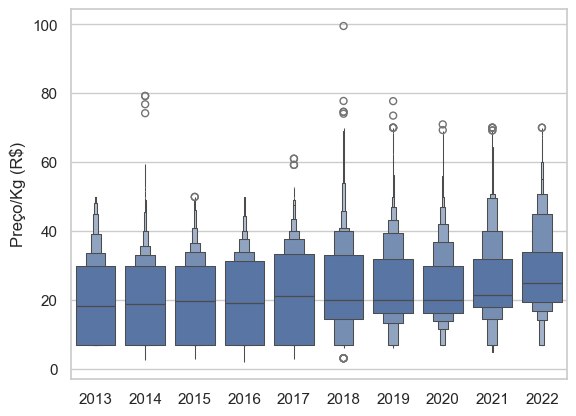

In [15]:
sns.boxenplot(data=df_dataset_beef_cls.loc[
	(df_dataset_beef_cls['codigo'] ==51) &
    (df_dataset_beef_cls['rule_apply'] == 1)
], x="ano", y="price_kg")

plt.xlabel('')
plt.ylabel('Preço/Kg (R$)')

# Set Outliers

set outliers and export

In [16]:
df_dataset_beef_cls.loc[
	(df_dataset_beef_cls['codigo'] == 41) &
    ((df_dataset_beef_cls['price_kg'] > 25) | (df_dataset_beef_cls['price_kg'] < 3)),
    'outlier'
] = 1

df_dataset_beef_cls.loc[
	(df_dataset_beef_cls['codigo'] == 11) &
    ((df_dataset_beef_cls['price_kg'] > 60) | (df_dataset_beef_cls['price_kg'] < 3)),
    'outlier'
] = 1

df_dataset_beef_cls.loc[
	(df_dataset_beef_cls['codigo'] == 14) &
    ((df_dataset_beef_cls['price_kg'] > 38) | (df_dataset_beef_cls['price_kg'] < 3)),
    'outlier'
] = 1

df_dataset_beef_cls.loc[
	(df_dataset_beef_cls['codigo'] == 22) &
    ((df_dataset_beef_cls['price_kg'] > 40) | (df_dataset_beef_cls['price_kg'] < 2.55)),
    'outlier'
] = 1

df_dataset_beef_cls.loc[
	(df_dataset_beef_cls['codigo'] == 12) &
    ((df_dataset_beef_cls['price_kg'] > 40) | (df_dataset_beef_cls['price_kg'] < 2.55)),
    'outlier'
] = 1

df_dataset_beef_cls.loc[
	(df_dataset_beef_cls['codigo'] == 51) &
    ((df_dataset_beef_cls['price_kg'] > 43) | (df_dataset_beef_cls['price_kg'] < 1)),
    'outlier'
] = 1

df_dataset_beef_cls.loc[
	(df_dataset_beef_cls['codigo'] == 15) &
    ((df_dataset_beef_cls['price_kg'] > 60) | (df_dataset_beef_cls['price_kg'] < 4)),
    'outlier'
] = 1

df_dataset_beef_cls.loc[
	(df_dataset_beef_cls['codigo'] == 31) &
    ((df_dataset_beef_cls['price_kg'] > 45) | (df_dataset_beef_cls['price_kg'] < 3)),
    'outlier'
] = 1

df_dataset_beef_cls.loc[
	(df_dataset_beef_cls['codigo'] == 33) &
    ((df_dataset_beef_cls['price_kg'] > 45) | (df_dataset_beef_cls['price_kg'] < 3)),
    'outlier'
] = 1

df_dataset_beef_cls.loc[
	(df_dataset_beef_cls['codigo'] == 32) &
    ((df_dataset_beef_cls['price_kg'] > 45) | (df_dataset_beef_cls['price_kg'] < 5)),
    'outlier'
] = 1

df_dataset_beef_cls.loc[
	(df_dataset_beef_cls['codigo'] == 16) &
    ((df_dataset_beef_cls['price_kg'] > 35) | (df_dataset_beef_cls['price_kg'] < 3)),
    'outlier'
] = 1

# Apply special rule for outliers

In [17]:
df_sr_outline_1 = df_dataset_beef_cls.query('codigo == 11 and outlier == 1 and item.str.extract(r"(\d+) ?KG").astype("float")[0] > 1')


df_dataset_beef_cls.loc[df_sr_outline_1.index, 'unit_kg'] = df_sr_outline_1.eval('item.str.extract(r"(\d+) ?KG").astype("float")[0] * qt')
df_dataset_beef_cls.loc[df_sr_outline_1.index, 'price_kg'] = df_sr_outline_1.eval('valor / (item.str.extract(r"(\d+) ?KG").astype("float")[0] * qt)')
df_dataset_beef_cls.loc[df_sr_outline_1.index, 'rule_apply'] = 1
df_dataset_beef_cls.loc[df_sr_outline_1.index, 'outlier'] = 0


# Export

In [18]:
df_dataset_beef_cls['produtos'] = df_dataset_beef_cls['produtos'].astype(str)
df_dataset_beef_cls['dados.CNPJ.CPF'] = df_dataset_beef_cls['dados.CNPJ.CPF'].astype(str)
df_dataset_beef_cls['dados.emissao'] = df_dataset_beef_cls['dados.emissao'].astype(str)
df_dataset_beef_cls['un'] = df_dataset_beef_cls['un'].astype(str)

# drop fields
df_dataset_beef_cls.drop(['is_outlier_valor_un','quartile_range_valor_un','is_outlier_qt','quartile_range_qt'],axis=1,inplace=True)

df_dataset_beef_cls.to_parquet(f'data/banco_carnes_un_v{version}_ed.parquet')

# Compute Stat

In [19]:
df_stat_rule = df_dataset_beef_cls.groupby(['produtos','rule_apply']).agg(
    count=('rule_apply', 'count')
).reset_index()



df_stat_rule['percent'] = df_stat_rule['count'] / df_stat_rule.groupby('produtos')['count'].transform('sum') * 100
df_stat_rule.to_csv('data/stat_rule_apply.csv')

df_stat_rule

,produtos,rule_apply,count,percent
0,0,0,14274,100.00
1,"ALMÔNDEGAS, HAMBURGERS E NUGGETS",0,57650,100.00
2,AVES,0,37995,2.06
3,AVES,1,1808917,97.94
4,CARNE BOVINA,0,58633,2.60
5,CARNE BOVINA,1,2199988,97.40
6,CARNE SUINA,0,9232,3.53
7,CARNE SUINA,1,252261,96.47
8,CARNES SECAS E SALGADAS,0,21973,6.10
9,CARNES SECAS E SALGADAS,1,338379,93.90


In [20]:
df_dataset_beef_cls.loc[
    (df_dataset_beef_cls['codigo'] == 11) & (df_dataset_beef_cls['rule_apply'] == 1)
].groupby('outlier').count()

,...1,ano,UF,municipio,dados.fornecedor,dados.CNPJ.CPF,dados.tipo,dados.n_doc,dados.emissao,valor_total_nota_fiscal,...,produtos,un_adj,has_change,unit_kg,price_kg,median_price,rule_apply,rule_version,rule_id,valor_un_ref
outlier,,,,,,,,,,,,,,,,,,,,,
0,2199410,2199410,2199410,2199410,2199410,2199410,2199410,2199410,2199410,2199410,...,2199410,2199410,2199410,2199410,2199410,2199410,2199410,2199410,2199410,2199410
1,578,578,578,578,578,578,578,578,578,578,...,578,578,578,578,578,578,578,578,578,578


In [21]:
df_dataset_beef_cls.groupby(by=['rule_apply']).agg(
    count=('rule_apply', 'count'),
    percent_prod=('rule_apply', lambda x: len(x) / len(df_dataset_beef_cls) * 100)
).reset_index()

,rule_apply,count,percent_prod
0,0,384067,5.02
1,1,7272191,94.98
